# Coding Exercise #6 *Modelocking, time-bandwidth-products, and pulse broadening due to material dispersion.*

### 6.1 Modelocking

**a)** Write a function `Et_LM(t, d, m, A, phi)` that returns the field, sampled on time axis `t`, of the `m`th longitudinal mode (LM) of a cavity of length `d`. `A` and `phi` are the amplitude and phase offset of the LM, respectively. You may assume that the LM is a cw wave.

In [1]:
import numpy as np
import random
c=3e8
def Et_LM(t,d,m,A,phi):
    mu=m*c/(2*d)
    if phi==None:
        phi=random.random()*2*np.pi
    return A*np.exp(1J*phi)*np.exp(1J*2*np.pi*mu*t)

**b)** Write a function `Et_LM_sum(t, d, m1, m2, phi=None)` which returns the coherent superposition (sum) of all LMs in the `m` range `m1` to `m2` for a cavity of length `d`, where `m` is the LM mode number. If the optional argument `phi` is omitted, then the phase offset of each LM should bet set to a random number in the range $0-2\pi$ radians, else the phase offset should be set to `phi`. You may assume that each LM has an amplitude of 1.

In [2]:
def Et_LM_sum(t, d, m1, m2, phi=None):
    E_tot=0
    modes=np.arange(m1,m2+1,1)
    for m in modes:
        E_tot+=Et_LM(t,d,m,1,phi)
    return E_tot
    

**c)** Consider a Nd:YAG laser with a cavity length of $1\,$m. LMs in the range $\pm 1\,$nm of its gain centre ($1064\,$nm) are lasing. Plot the laser ouptput intensity $I(t)\propto|E(t)|^2$ in the time-interval $0-30\,$ns, using ~10000 points to ensure adequate sampling for (i) random phase offsets between all LMs (ii) constant phase-offset between all LMs, i.e. *mode-locked*. You may assume all LMs have an amplitude of 1 and the output intensity can be displayed in arbitrary units.

Record your results.

In [3]:
d=1#m
import matplotlib.pyplot as plt
wavel0=1064e-9
m0=int(2*d/wavel0)
print(m0)
modes=np.arange(m0-10000,m0+10000,1)
def wavel_m(d,m):
    return 2*d/m
lasing_modes=[]
for i in modes:
    if np.abs(wavel_m(d,i)-wavel0)<1e-9:
        lasing_modes.append(i)
#print(modes[0],modes[-1])
#print(lasing_modes[0],lasing_modes[-1])
#print(wavel_m(d,lasing_modes[0]),wavel_m(d,lasing_modes[-1]))

#i) random phase
t=np.linspace(0,30e-9,1000)
I=[]
for i in t:
    I.append(np.abs(Et_LM_sum(i,d,lasing_modes[0],lasing_modes[-1]))**2)
I=np.array(I)
plt.plot(t,I)
plt.show()

#ii) const phase offset
I2=[]
for i in t:
    I2.append(np.abs(Et_LM_sum(i,d,lasing_modes[0],lasing_modes[-1],phi=0))**2)
I2=np.array(I2)
plt.plot(t,I2)
plt.show()
    

1879699


**d)** Show that the pulse spacing in the modelocked train is given by $T_{rep}=2d/c$.

Hint: you can do this by inspecting the plot carefully, or write some code to find the peak positions, eg. using `find_peaks` from `scipy.signal`.

6.666666666666666e-09
6.666666666666667e-09


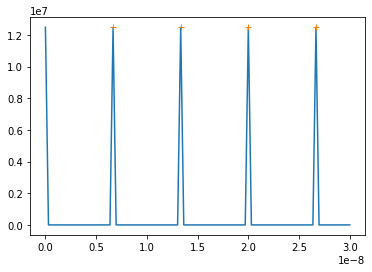

In [ ]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(I2,height=1e7)
diff=[]
for i in range(len(peaks)):
    if i>0:
        diff.append(t[peaks[i]]-t[peaks[i-1]])

T_rep=np.mean(diff)
print(T_rep)
print(2*d/c)
plt.plot(t,I2)
plt.plot(t[peaks],I2[peaks],ls="None",marker="+")
plt.show()

**e)** Recalculate and plot the mode-locked output but now zoom in on a single peak in the pulse train and use a new time axis to ensure the pulse has ~200 samples.

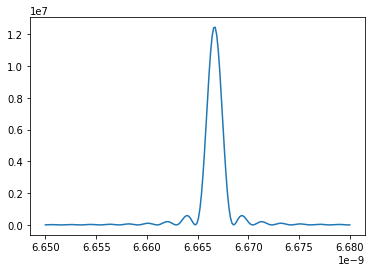

In [ ]:
t_zoom=np.linspace(6.65e-9,6.68e-9,200)
I_zoom=[]
for i in t_zoom:
    I_zoom.append(np.abs(Et_LM_sum(i,d,lasing_modes[0],lasing_modes[-1],phi=0))**2)
I_zoom=np.array(I_zoom)
plt.plot(t_zoom,I_zoom)
plt.show()
    

**f)** Show the width of the peaks in the mode-locked train is ~$\frac{2\pi}{N\Delta\omega_m}$, where $N$ is the number of LMs involved and $\Delta\omega_m$ is the LM spacing. 

Hint: You could reuse your `get_width` function from Exercise # 1.

**NOTE**: There is an error in the lecture notes for this formula! The $2\pi$ is missing in the numerator - sorry!

In [ ]:
def get_width(x,y,frac=2):
    #default is frac=2 which is fwhm width
    d = y - (max(y) / frac) 
    indices = np.where(d > 0)[0] 
    return abs(x[indices[-1]] - x[indices[0]])

width=get_width(t_zoom,I_zoom)
print(width)
def theor_width(lasing_modes):
    return 2*np.pi/(len(lasing_modes)*np.pi*c/d)
print(theor_width(lasing_modes))

1.6582914572864836e-12
1.8869704689121614e-12


### 6.2 Time-Bandwidth Products

**a)** Write functions `Et_gauss(t, E0, dt_fwhm, lambda0)` and `Et_sech(t, E0, dt_fwhm, lambda0)` that return the electric fields of a transform-limited gaussian and sech pulse, respectively, where `t` is the time axis which the field will be sampled on, `E0` is the peak field, `dt_fwhm` is the fwhm duration for the intensity pulse $I(t)$, and `lambda0` is the centre wavelength.

Plot the field and the intensity as a function of time for $10\,$fs pulses with a centre wavelength of  $800\,$nm for both the gaussian and sech cases.

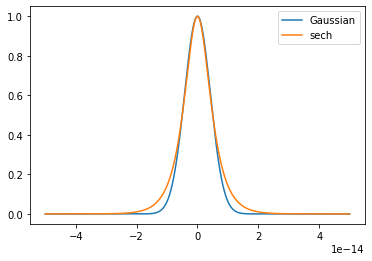

d:\python\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
d:\python\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


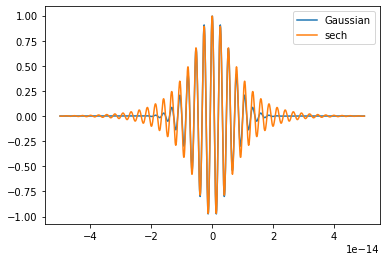

In [ ]:

def Et_gauss(t,E0,dt_fwhm,lambda0):
    sigma=dt_fwhm/(2*np.sqrt(2*np.log(2)))
    return E0*np.exp(-t**2/(4*sigma**2))*np.exp(1J*c/lambda0*2*np.pi*t) #extra factor 1/2 in exponent to go from I to E
                     
def Et_sech(t,E0,dt_fwhm,lambda0):
    T=dt_fwhm/(2*np.log(2+np.sqrt(3)))
    return E0*np.sqrt(1/np.cosh(t/T))*np.exp(1J*c/lambda0*2*np.pi*t) #square root to go from I to E
    #return E0*(1/np.cosh(t/T))*np.exp(1J*c/lambda0*2*np.pi*t) #square root to go from I to E
    
    
lambda0=800e-9
dt_fwhm=10e-15
E0=1
t=np.linspace(-50e-15,50e-15,1000)
plt.plot(t,np.abs(Et_gauss(t,E0,dt_fwhm,lambda0))**2,label="Gaussian")
plt.plot(t,np.abs(Et_sech(t,E0,dt_fwhm,lambda0))**2,label="sech")
plt.legend()
plt.show()

plt.plot(t,Et_gauss(t,E0,dt_fwhm,lambda0),label="Gaussian")
plt.plot(t,Et_sech(t,E0,dt_fwhm,lambda0),label="sech")
plt.legend()
plt.show()

**b)** By taking the fourier transform of a $10\,$fs FWHM tranform-limited laser pulse, show that its time-bandwidth product $\Delta \nu \Delta t\approx 0.44$.

Repeat for a sech pulse to show its time-bandwidth product $\Delta \nu \Delta t\approx 0.32$.

**Hints**

* You can use `scipy.fft` for this. Feel free to use the function below which uses `scipy.fft` or write your own!
* use a time axis from -100 to 100 fs with 1024 points.
* If you don't get an accurate answer, it might be because you don't have enough points in your curves to measure the FWHMs accurately, e.g. using `get_width`. If this is the case, you can use `np.interp` to make an interpolating function to your curves which you can then sample more finely.


In [ ]:
from scipy.fft import fft, fftfreq, fftshift
def get_intensity_spectrum(t, Et):
    """ 
    Uses scipy.fft to calculate the intensity spectrum of a laser pulse E(t). 
    `t` is time axis, `Et` is (complex) laser electric field sampled on t
    returns tuple (`omega`, `I`), where `omega` is angular frequency and `I` is spectral intensity.
    
    Tip: use 1024 or 2048 time points
    """
    assert len(t) == len(Et)
 
    t = np.array(t)
    Et = np.array(Et)
    
    N = len(t) # num points
    dt = t[1]-t[0] # time step
    f = fftfreq(N, dt) # frequency axis
    f = fftshift(f) # shift zero-frequency component to center of spectrum
    omega = 2 * np.pi * f # angular frequency axis

    Ef = fft(Et) # the fft
    Ef = fftshift(Ef) # shift zero-frequency component to center of spectrum
    I = np.abs(Ef)**2
    I /= max(I)
   
    return omega, I

dt_fwhm=10e-15
t=np.linspace(-100e-15,100e-15,2048)
t_highres=np.linspace(-100e-15,100e-15,10000000)
Et_g=Et_gauss(t,E0,dt_fwhm,lambda0)
dt_gauss=get_width(t_highres,np.interp(t_highres,t,Et_g))
mu_gauss,I_gauss=get_intensity_spectrum(t,Et_g)
dmu_gauss=get_width(mu_gauss,I_gauss)/(2*np.pi)
print("Gauss: ", dt_gauss*dmu_gauss)

Et_s=Et_sech(t,E0,dt_fwhm,lambda0)
dt_sech=get_width(t_highres,np.interp(t_highres,t,Et_s))
mu_sech,I_sech=get_intensity_spectrum(t,Et_s)
dmu_sech=get_width(mu_sech,I_sech)/(2*np.pi)
print("sech: ", dt_sech*dmu_sech)

Gauss:  0.4498594797516019
sech:  0.22526717506579386


### 6.3 Pulse broadening due to material dispersion

**a)** Write a function `n_fused_silica(lam)` that returns the refractive index of "fused silica" (a type of glass commonly used in optics) as a function of the wavelength `lam` in metres.

The formula can be found at 
[here](https://refractiveindex.info/?shelf=glass&book=fused_silica&page=Malitson). If you scroll down to the bottom of the page you will see `Expressions for n`, note that the wavelength is in microns.

In [ ]:
def n_fused_silica(lam):
    x=lam*10**6
    return (1+0.6961663/(1-(0.0684043/x)**2)+0.4079426/(1-(0.1162414/x)**2)+0.8974794/(1-(9.896161/x)**2))**.5



**b)** Check your function against the calculator on the webpage.

In [ ]:
print(n_fused_silica(0.5876e-6))

1.458462342053241


**c)** Create a `numpy` array `omega` that covers the wavelength range $3000-200\,$nm in 1000 steps. Then create a `numpy` array `n` that is the refractive index of fused silica sampled on `omega`. Plot `n` vs `omega`.

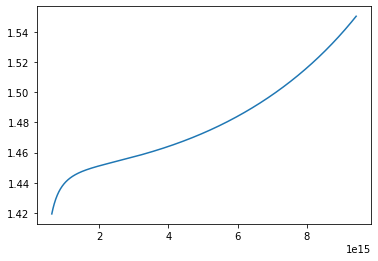

In [ ]:
omega=np.linspace(2*np.pi*c/(3000e-9),2*np.pi*c/(200e-9),1000)
n=n_fused_silica(2*np.pi*c/omega)
plt.plot(omega,n)
plt.show()

**d)** Use the function `dydx` below to generate `numpy` arrays `dndomega` and `d2ndomega2` that are the first and second derivative of the refractive index, respectively, versus `omega`. Plot `dndomega` vs omega and `d2ndomega2` vs `omega` on separate plots.

In [ ]:
def dydx(x, y):
    """ returns derivative with same shape as y, as opposed to np.diff which returns a shorter array """
    assert len(x) == len(y)
    x = np.array(x)
    y = np.array(y)
    dx = x[1] - x[0]
    return np.gradient(y, dx)

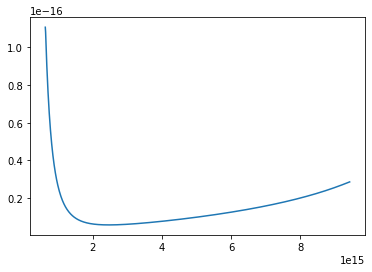

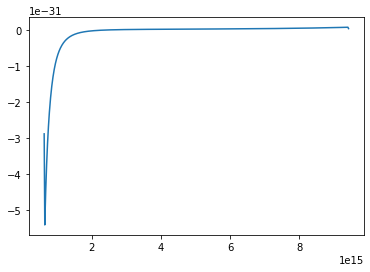

In [ ]:
dndomega=dydx(omega,n)
d2ndomega2=dydx(omega, dndomega)
plt.plot(omega,dndomega)
plt.show()
plt.plot(omega,d2ndomega2)
plt.show()

**e)** Construct a `numpy` array `vg` for the group velocity of light in fused silica, sampled on `omega` using the formula from the lecture notes:

### $v_g(\omega) =\frac{c}{n(\omega)+\omega \frac{dn(\omega)}{d\omega}}$.

Plot `vg` versus `omega` and record your observations.

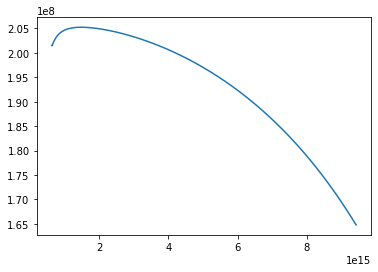

In [ ]:
def v_g(omega,n,dndomega):
    return c/(n+omega*dndomega)
vg=v_g(omega,n,dndomega)
plt.plot(omega,vg)
plt.show()

**f)** Now create a `numpy` array `GVD` which is the group velocity dispersion sampled on `omega`. The GVD is defined as:

### $GVD = \frac{dv_g^{-1}}{d\omega}$.

Plot `GVD` in the commonly-used units of fs$^2$/mm vs `omega`.

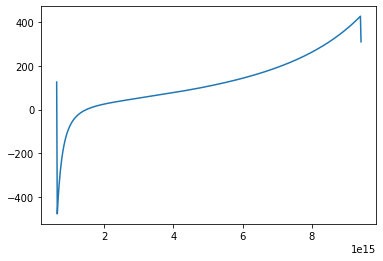

In [ ]:
def GVD(omega,vg):
    return dydx(omega,1/vg)*10**(30)/1000
GVD_=GVD(omega,vg)
plt.plot(omega,GVD_)
plt.show()

**g)** A transform-limited gaussian pulse of duration `dt_in` propagates through a distance `L` of material with a GVD of `GVD`. Write a function `dt_out(dt_in, L, GVD)` that returns the broadened pulse duration. The relevant formulae from the lecture notes are:

### $\Delta t_{spread} = L*GVD*\Delta\omega$
### $\Delta t_{out} = \sqrt{\Delta t_{in}^2 + \Delta t_{spread}^2}$

A $5\,$fs transform-limited gaussian pulse propagating $1\,$mm through a material with a GVD of $35\,$fs$^2$/mm should be broadened to a duration of $20.0\,$fs. Use this to check your function.

In [ ]:
def dt_out(dt_in,L,GVD):
    dom=2*np.pi*0.44/(dt_in) #assume transform limited gaussian
    dt_spread=L*GVD*dom
    return np.sqrt(dt_in**2+dt_spread**2)

print(dt_out(5,1,35)) #yes, 20

19.987697735406556


## Extension

**h)** Because the GVD is frequency dependent, the amount of broadening that a laser pulse suffers depends on its centre frequency (centre wavelength).

Calculate and plot the broadening factor $\Delta t_{out}/\Delta t_{in}$ versus $\lambda_0$ in the range $200-3000\,$nm for an initially $5\,$fs transform-limited gaussian laser pulse propagating through $1\,$mm of fused silica, where the $\lambda_0$ is the centre wavelength of the pulse.

Hint: To allow you to calculate the GVD at an arbitrary frequency, use the function `interpolate.interp1d` from `scipy` to make an interpolating function to your previous `numpy` array `GVD`.

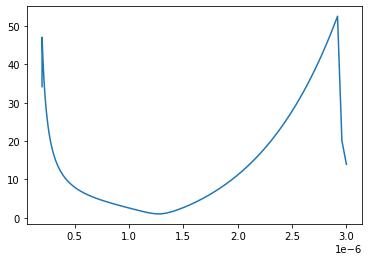

In [ ]:
dt_in=5
L=1
f=[]
for i in range(len(omega)):
    f.append(dt_out(dt_in,L,GVD_[i])/dt_in)
f=np.array(f)
plt.plot(2*np.pi*c/(omega),f)
plt.show()
    